In [184]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras import models
from keras import layers

from ta import *

In [139]:
parent_dir = os.path.abspath(os.pardir)
file = os.path.join(parent_dir, 'dat', 'EURUSD240.csv')

# read in file
df = pd.read_csv(file, header=None)

# define columns
cols = ['date', 'time', 'open', 'high', 'low', 'close', 'volume']
df.columns = cols

# make df more human friendly
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time']) 
df.index = df['datetime']

# drop unnecessary columns
df.drop(['date', 'time', 'datetime'], axis = 1, inplace = True)

# compute returns
df['average_price']= df[['open','high','low','close']].mean(axis=1)
df['returns'] = df[['average_price']].pct_change()
df['flag'] = 0
df.loc[ df['returns'] > 0, 'flag' ] = 1

         
# visualize 
df.head()

,open,high,low,close,volume,average_price,returns,flag
datetime,,,,,,,,
2015-06-16 12:00:00,1.12583,1.12699,1.12042,1.12314,23724,1.124095,NaN,0
2015-06-16 16:00:00,1.12314,1.12541,1.12136,1.12412,21052,1.123508,-0.000523,0
2015-06-16 20:00:00,1.12412,1.12518,1.12334,1.12465,8645,1.124322,0.000725,1
2015-06-17 00:00:00,1.12461,1.12503,1.12378,1.12435,5589,1.124443,0.000107,1
2015-06-17 04:00:00,1.12433,1.12661,1.12433,1.12581,7153,1.125270,0.000736,1


In [172]:
df = add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna=True)
df.fillna(method='bfill', inplace=True)
df.head(10)

C:\Users\lawre\Documents\GitHub\Projects\lib\ta\trend.py:605: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  aroon_up = close.rolling(n).apply(lambda x: float(np.argmax(x) + 1) / n * 100)
C:\Users\lawre\Documents\GitHub\Projects\lib\ta\trend.py:627: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  aroon_down = close.rolling(n).apply(lambda x: float(np.argmin(x) + 1) / n * 100)


,open,high,low,close,volume,average_price,returns,flag,volume_adi,volume_obv,...,momentum_mfi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,others_dr,others_dlr,others_cr
datetime,,,,,,,,,,,,,,,,,,,,,
2015-06-16 12:00:00,1.12583,1.12699,1.12042,1.12314,23724,1.124095,-0.000523,0,0.000000,0,...,50.0,0.000000,50.0,50.0,50.0,-50.0,0.0,0.000000,0.000000,0.000000
2015-06-16 16:00:00,1.12314,1.12541,1.12136,1.12412,21052,1.123508,-0.000523,0,3560.712735,21052,...,50.0,100.000000,50.0,50.0,50.0,-50.0,0.0,0.087255,0.087217,0.087255
2015-06-16 20:00:00,1.12412,1.12518,1.12334,1.12465,8645,1.124322,0.000725,1,11305.824557,8645,...,50.0,100.000000,50.0,50.0,50.0,-50.0,0.0,0.047148,0.047137,0.134445
2015-06-17 00:00:00,1.12461,1.12503,1.12378,1.12435,5589,1.124443,0.000107,1,3172.896261,-5589,...,50.0,90.269164,50.0,50.0,50.0,-50.0,0.0,-0.026675,-0.026679,0.107734
2015-06-17 04:00:00,1.12433,1.12661,1.12433,1.12581,7153,1.125270,0.000736,1,1641.518877,7153,...,50.0,87.680923,50.0,50.0,50.0,-50.0,0.0,0.129853,0.129769,0.237726
2015-06-17 08:00:00,1.12581,1.12915,1.12410,1.12617,21843,1.126308,0.000922,1,-1802.714469,21843,...,50.0,86.759846,50.0,50.0,50.0,-50.0,0.0,0.031977,0.031972,0.269779
2015-06-17 12:00:00,1.12614,1.12838,1.12464,1.12663,23160,1.126447,0.000124,1,-2449.862138,23160,...,50.0,86.535935,50.0,50.0,50.0,-50.0,0.0,0.040846,0.040838,0.310736
2015-06-17 16:00:00,1.12664,1.12772,1.12240,1.12643,20782,1.125798,-0.000577,0,12189.714487,-20782,...,50.0,84.935550,50.0,50.0,50.0,-50.0,0.0,-0.017752,-0.017754,0.292929
2015-06-17 20:00:00,1.12643,1.13572,1.12049,1.13361,30668,1.129063,0.002900,1,32873.877660,30668,...,50.0,86.927924,50.0,50.0,50.0,-50.0,0.0,0.637412,0.635389,0.932208


In [226]:
cols_to_extract = ['open', 'high', 'low', 'close', 'volume', 'average_price', 'returns',
                   'volume_adi', 'volume_obv', 'volume_obvm', 'volume_cmf',
                   'volume_fi', 'volume_em', 'volume_vpt', 'volume_nvi', 'volatility_atr',
                   'volatility_bbh', 'volatility_bbl', 'volatility_bbm', 'volatility_bbhi',
                   'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
                   'volatility_kchi', 'volatility_kcli', 'volatility_dch',
                   'volatility_dcl', 'volatility_dchi', 'volatility_dcli', 'trend_macd',
                   'trend_macd_signal', 'trend_macd_diff', 'trend_ema_fast',
                   'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
                   'trend_adx_ind', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
                   'trend_vortex_diff', 'trend_trix', 'trend_mass_index', 'trend_cci',
                   'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff',
                   'trend_ichimoku_a', 'trend_ichimoku_b', 'trend_aroon_up',
                   'trend_aroon_down', 'trend_aroon_ind', 'momentum_rsi', 'momentum_mfi',
                   'momentum_tsi', 'momentum_uo', 'momentum_stoch',
                   'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'others_dr',
                   'others_dlr', 'others_cr'
                  ]

In [227]:
X = df.loc[:, cols_to_extract].values
Y = df.loc[:, 'flag'].values

In [228]:
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis=0)

X /= std

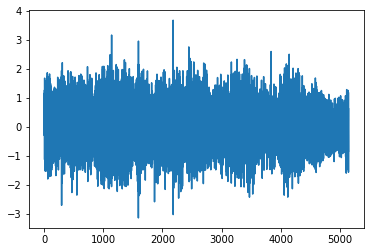

In [229]:
x_train = X
y_train = y

x_val = x_train[:4000]
partial_x_train = x_train[4000:]

y_val = y_train[:4000]
partial_y_train = y_train[4000:]

In [230]:
print('Size of X: ', X.shape)
print('Size of y: ', y.shape)



Size of X:  (5150, 9)
Size of y:  (5150,)


In [231]:
from keras import optimizers
from keras import losses
from keras import metrics


model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))


model.compile(optimizer=optimizers.Adam(lr=0.1),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [232]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    validation_data=(x_val,y_val))

Train on 1150 samples, validate on 4000 samples
Epoch 1/20
1150/1150 [==============================] - 1s 1ms/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0.5032
Epoch 2/20
1150/1150 [==============================] - 0s 202us/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0.5032
Epoch 3/20
1150/1150 [==============================] - 0s 201us/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0.5032
Epoch 4/20
1150/1150 [==============================] - 0s 200us/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0.5032
Epoch 5/20
1150/1150 [==============================] - 0s 206us/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0.5032
Epoch 6/20
1150/1150 [==============================] - 0s 204us/step - loss: 7.8742 - binary_accuracy: 0.5061 - val_loss: 7.9194 - val_binary_accuracy: 0